# Feature Selection


## Mount Google Drive

In [1]:
#mount google drive
from google.colab import drive
import glob
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Loading the data

In [3]:
import numpy as np
import os
import cv2
import csv
import json
import pandas as pd
import math 

In [4]:
normal_csv = '/content/gdrive/MyDrive/ICU/Output/All/V1-original/Normal.csv'
burglar_csv = '/content/gdrive/MyDrive/ICU/Output/All/V1-original/Burglar.csv'

In [49]:
normal_csv = '/content/gdrive/MyDrive/ICU/Output/All/V2-original/normal.csv'
burglar_csv = '/content/gdrive/MyDrive/ICU/Output/All/V2-original/burglar.csv'

In [50]:
normal_df = pd.read_csv(normal_csv, header=None)
burglar_df = pd.read_csv(burglar_csv, header=None)
data_df = normal_df.append(burglar_df, ignore_index=False)

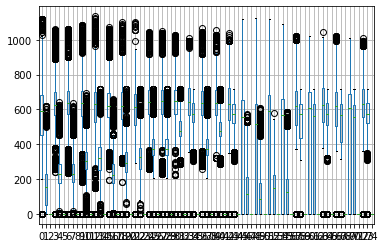

In [6]:
import matplotlib.pyplot as plt
normal_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b9e9f1710>,
      dtype=object)

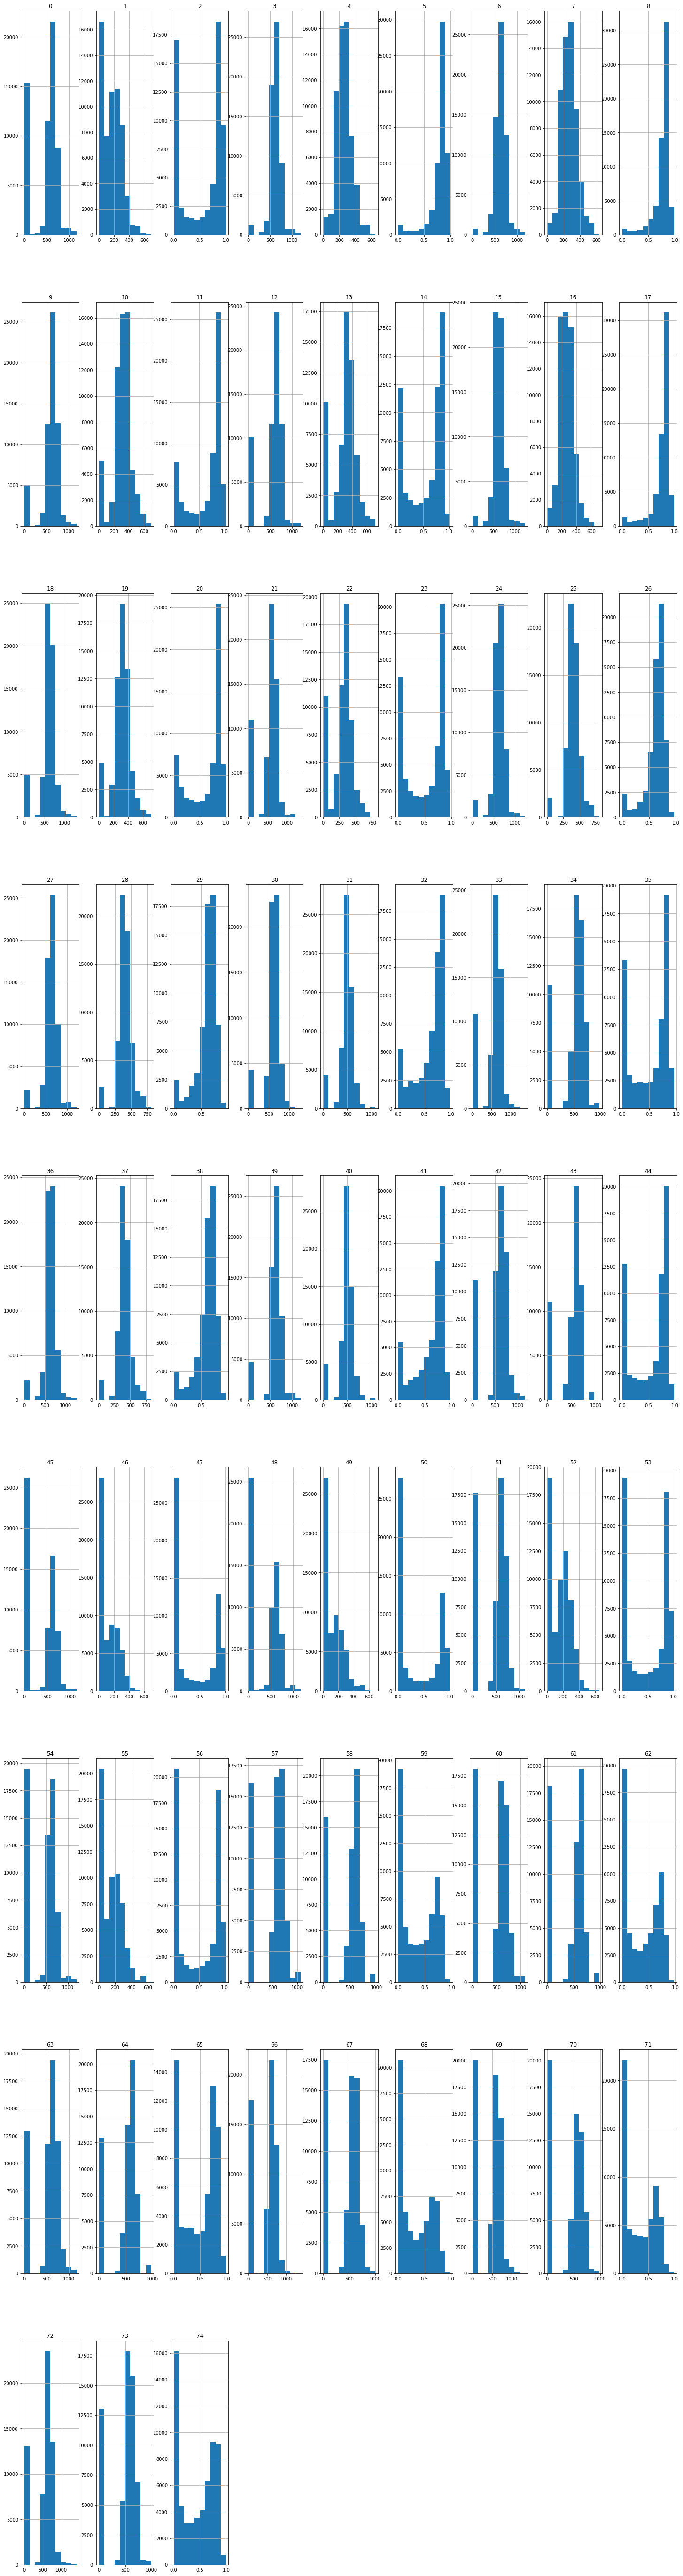

In [11]:
plt.rcParams["figure.figsize"] = (25,100)
data_df.hist()

In [ ]:
data_df.plot(kind = 'bar')
plt.ylabel('frequency')
plt.xlabel('features')
plt.title('histogram')
plt.show()

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dy = sns.countplot(rated.year, color="#53A2BE", order = list(range(rated.year.min(),rated.year.max()+1)))
axes = dy.axes
dy.set(xlabel='Release Year', ylabel = "Count")
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.show()

NameError: ignored

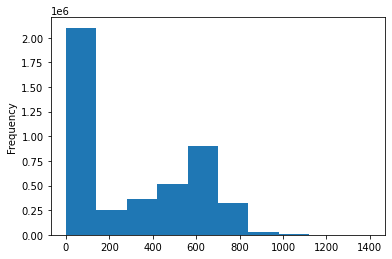

In [18]:
data_df.stack().plot.hist()

In [8]:
drop = [75,76]

In [9]:
data_df = data_df.drop(columns=data_df.columns[drop], axis=0)

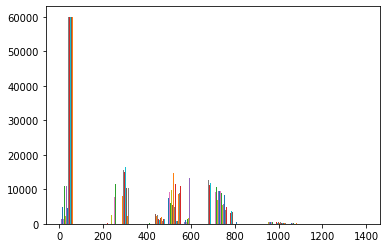

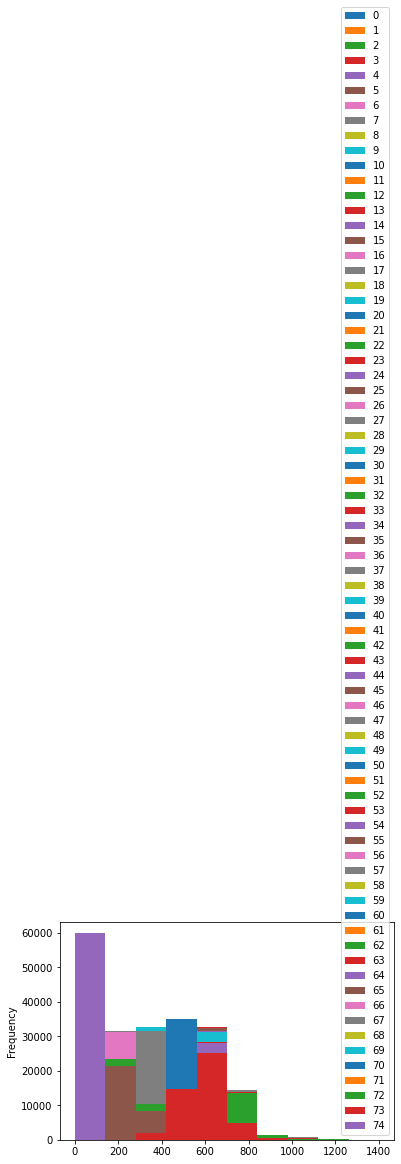

In [10]:
import matplotlib.pyplot as plt

plt.hist(data_df.values,bins=20)
plt.show()

data_df.plot.hist()

## Feature Engineering (prepare data )

###Drop the features which aren't neccessary to determine the action

In [51]:
drop = list(range(45,75)) 

In [52]:
all_data = data_df.drop(columns=data_df.columns[drop], axis=0).to_numpy()

### Assign zero to the features which have low confidence

In [15]:
def removeLowConfidence(data_array):
  data= []
  for i in range(len(data_array)):
    count = 0 
    row = []
    for j in range(len(data_array[i])):
      row = data_array[i]
      if((j+1)%3==0 and row[j] < 0.2):
        count = count + 1
        row[j] = 0
        row[j-1] = 0
        row[j-2] = 0
    
    if(count < 7):
      data.append(row)
  return data

### Calculate coordinates relative to a joint (#1)

In [16]:
def calculateRelativePositionOfJoints(data_array):
  count = 0
  data = []
  for i in range(len(data_array)):
    if(data_array[i][5] > 0.3):
      count  = count +1
      data.append(np.array(data_array[i]))

  for i in range(len(data)):
    for j in range(len(data[i])):
      neck_x = data[i][3]
      neck_y = data[i][4]
      if(not (j == 3 or j == 4 or j == 45 or j==46)):
        #x coordinate
        if(j%3==0):
          if(data[i][j]!= 0):
            data[i][j] = data[i][j] - neck_x

        #y coordinate
        elif((j-1)%3==0):
          if(data[i][j]!= 0):
            data[i][j] = data[i][j] - neck_y

  return data

In [17]:
def makeEqualSequences(data_array,length):
  data = []
  for sequence in data_array:
    max = len(sequence)
    step = int(math.ceil(max/length))
    if(step > 1):
      batch = []
      for i in range(0,max,step):
        batch.append(np.asarray(sequence[i]))
      data.append(np.array(batch))
    else:
      data.append(np.asarray(sequence)) 
  return np.asarray(data)

## Separate training, test data and labels

In [53]:
def split_dataset(test_data,train_data,test_labels,train_labels,data):
  normal_array = []
  burglar_array = []
  normal_label = '001'
  burglar_label = '001'
  normal_count = 0
  burglar_count = 0

  for row in data:
    if(row[46] == 'Normal'):

      if(row[45][1:4] == normal_label):
        row = np.delete(row,46) #remove file name and label
        row = np.delete(row,45)
        # row = np.delete(row,col)
        normal_array.append(row)

      else:
        normal_count =  normal_count + 1
        if( normal_count <= 30 or normal_count >= 141):
          test_labels.append(0)
          test_data.append(np.array(normal_array))

        elif( normal_count > 30 and normal_count < 141):
          train_labels.append(0)
          train_data.append(np.array(normal_array))

        normal_array= []
        normal_label = row[45][1:4]
        row = np.delete(row,46)
        row = np.delete(row,45)
        # row = np.delete(row, col)
        normal_array.append(row)
        
    else:

      if(row[45][0:3] == burglar_label):
        row = np.delete(row,46) #remove file name and label
        row = np.delete(row,45)
        # row = np.delete(row, col)
        burglar_array.append(row)

      else:
        burglar_count = burglar_count + 1

        if(burglar_count < 29):
          test_labels.append(1)
          test_data.append(np.array(burglar_array))

        else:
          train_labels.append(1)
          train_data.append(np.array(burglar_array))

        burglar_array = []
        burglar_label = row[45][0:3]
        row = np.delete(row,46)
        row = np.delete(row,45)
        # row = np.delete(row, col)
        burglar_array.append(row)

  train_labels.append(1) 
  train_labels.append(0)
  train_data.append(np.array(burglar_array))
  train_data.append(np.array(normal_array))

In [19]:
dataset = all_data.copy()

In [ ]:
dataset =  removeLowConfidence(all_data.copy())

In [54]:
dataset = calculateRelativePositionOfJoints(dataset)

In [ ]:
dataset = calculateRelativePositionOfJoints(all_data.copy())

In [55]:
test_data = []
train_data = []

train_labels = []
test_labels = []
split_dataset(test_data,train_data,test_labels,train_labels,dataset)
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
test_data = makeEqualSequences(test_data,150)
train_data = makeEqualSequences(train_data,150)

## Masking and padding sequences

In [22]:
from keras.preprocessing.sequence import pad_sequences

In [56]:
train_data = pad_sequences(train_data, dtype='float32', value=-1, padding="post")
test_data = pad_sequences(test_data, dtype='float32',value=-1, padding="post")

## Normalize the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

## Shuffle the data

In [24]:
from sklearn.utils import shuffle

In [57]:
train_data, train_labels = shuffle(train_data,train_labels,random_state=0)

In [58]:
print(train_data.shape)
print(test_data.shape)

(222, 415, 45)
(104, 386, 45)


# Create Model

In [27]:
import numpy as np
import keras.backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, Masking,TimeDistributed
from keras.optimizers import Adam, RMSprop,Nadam
from keras import callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback

In [47]:
batch_size = 31
epochs = 300
n_classes = 2
n_features = 45

In [59]:
def create_model():
  model = Sequential()
  model.add(Masking(mask_value=-1, input_shape=(None, n_features)))
  model.add(Dense(n_features * 4, activation='elu',input_shape=(None, n_features)))
  model.add(LSTM(units = n_features * 3, return_sequences = True, unit_forget_bias=1.0))
  model.add(Dropout(0.4))
  model.add(LSTM(units = n_features, unit_forget_bias=1.0))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(
      optimizer=Adam(lr=0.000005),
      loss='mean_squared_error',
      metrics=['acc'])
  return model

# Train Model

In [61]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, None, 45)          0         
_________________________________________________________________
dense (Dense)                (None, None, 180)         8280      
_________________________________________________________________
lstm (LSTM)                  (None, None, 135)         170640    
_________________________________________________________________
dropout (Dropout)            (None, None, 135)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 45)                32580     
_________________________________________________________________
dropout_1 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [31]:
class MyThresholdCallback(Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_loss = logs["val_loss"]
        if val_loss <= self.threshold:
            self.model.stop_training = True

In [62]:
my_callback = MyThresholdCallback(threshold=0.12)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,cooldown=1,
                              patience=2, min_lr=0.000001, verbose=1)
history = model.fit(train_data, train_labels,
                    batch_size = batch_size, 
                    validation_split=0.3, 
                    epochs = epochs, 
                    shuffle=True,
                    verbose=2)

Epoch 1/300
5/5 - 13s - loss: 0.2641 - acc: 0.5161 - val_loss: 0.2632 - val_acc: 0.5373
Epoch 2/300
5/5 - 6s - loss: 0.2646 - acc: 0.5226 - val_loss: 0.2625 - val_acc: 0.5522
Epoch 3/300
5/5 - 6s - loss: 0.2692 - acc: 0.5226 - val_loss: 0.2616 - val_acc: 0.5522
Epoch 4/300
5/5 - 6s - loss: 0.2592 - acc: 0.5290 - val_loss: 0.2613 - val_acc: 0.5522
Epoch 5/300
5/5 - 6s - loss: 0.2520 - acc: 0.5226 - val_loss: 0.2610 - val_acc: 0.5522
Epoch 6/300
5/5 - 6s - loss: 0.2621 - acc: 0.5548 - val_loss: 0.2606 - val_acc: 0.5522
Epoch 7/300
5/5 - 6s - loss: 0.2549 - acc: 0.5161 - val_loss: 0.2600 - val_acc: 0.5522
Epoch 8/300
5/5 - 6s - loss: 0.2561 - acc: 0.5484 - val_loss: 0.2586 - val_acc: 0.5522
Epoch 9/300
5/5 - 6s - loss: 0.2481 - acc: 0.5677 - val_loss: 0.2576 - val_acc: 0.5522
Epoch 10/300
5/5 - 6s - loss: 0.2609 - acc: 0.5290 - val_loss: 0.2571 - val_acc: 0.5522
Epoch 11/300
5/5 - 6s - loss: 0.2502 - acc: 0.5484 - val_loss: 0.2567 - val_acc: 0.5522
Epoch 12/300
5/5 - 6s - loss: 0.2492 - a

In [48]:
del model
k.clear_session()

# Model Evaluation

In [36]:
import matplotlib.pyplot as plt

In [63]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


### Training Accuracy History

In [42]:
plt.rcParams["figure.figsize"] = (10.0, 8.0)

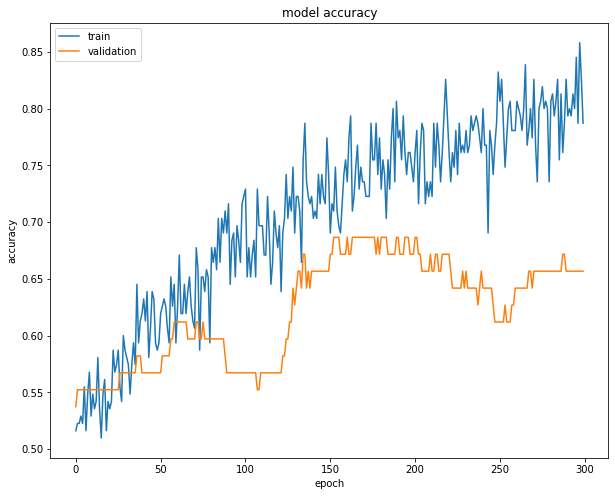

In [64]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

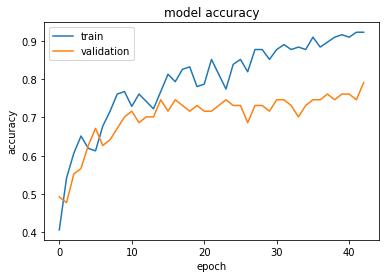

In [ ]:
# Attempt 4 LR 0.0002
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Training Loss History

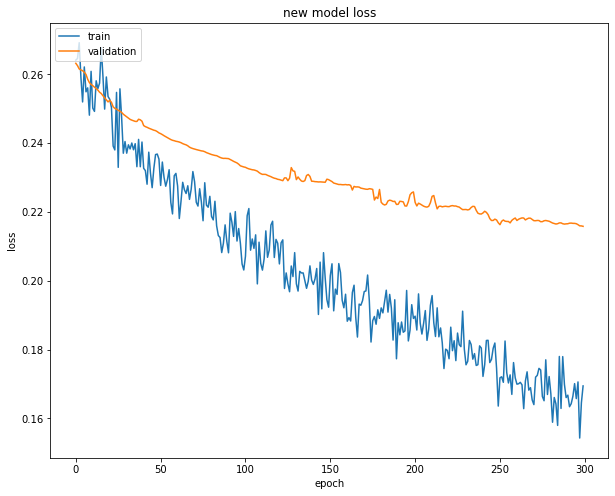

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('new model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

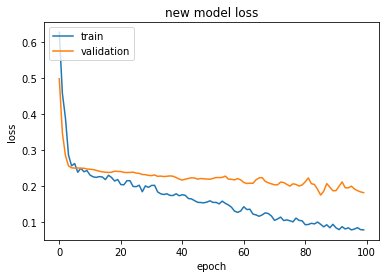

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('new model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

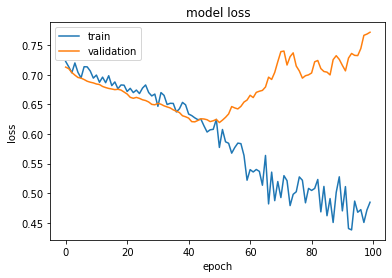

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate Accuracy with test data

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [45]:
results = model.evaluate(train_data, train_labels, batch_size=30)
print("train loss, train acc:", results)

8/8 [==============================] - 2s 261ms/step - loss: 0.1073 - acc: 0.8964
train loss, train acc: [0.10729707032442093, 0.8963963985443115]


In [46]:
results = model.evaluate(test_data, test_labels, batch_size=30)
print("test loss, test acc:", results)

4/4 [==============================] - 3s 234ms/step - loss: 0.1855 - acc: 0.7596
test loss, test acc: [0.18553860485553741, 0.7596153616905212]


## Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks() +1).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
predict = model.predict(test_data)

In [ ]:
print(predict)

[[0.55]
 [0.73]
 [0.17]
 [0.01]
 [0.23]
 [0.66]
 [0.35]
 [0.  ]
 [0.19]
 [0.37]
 [0.38]
 [0.7 ]
 [0.63]
 [0.  ]
 [0.5 ]
 [0.21]
 [0.08]
 [0.  ]
 [0.  ]
 [0.2 ]
 [1.19]
 [0.63]
 [0.37]
 [0.36]
 [0.  ]
 [0.41]
 [1.14]
 [1.44]
 [0.99]
 [0.04]
 [0.  ]
 [0.  ]
 [0.25]
 [0.14]
 [0.42]
 [0.32]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.04]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.18]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.14]
 [0.23]
 [0.  ]
 [0.11]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.07]
 [0.49]
 [0.04]
 [0.21]
 [0.28]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.08]
 [0.2 ]
 [0.  ]
 [0.  ]
 [0.99]
 [0.89]
 [0.96]
 [0.  ]
 [1.53]
 [1.12]
 [0.63]
 [0.61]
 [0.49]
 [0.58]
 [0.62]
 [0.75]
 [0.86]
 [0.72]
 [0.16]
 [0.65]
 [0.85]
 [1.39]
 [1.35]
 [1.5 ]
 [0.94]
 [0.66]
 [0.84]
 [0.78]
 [0.64]
 [0.93]
 [0.51]
 [0.75]]


In [ ]:
y_predict = []
y_predict = predict.round

In [ ]:
y_predict = []
y_predict = np.where( predict < 0.5, 0,1)

In [ ]:
print(y_predict)

Confusion matrix, without normalization
[[65 11]
 [ 3 25]]


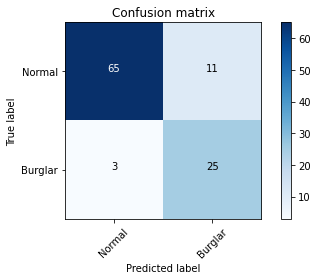

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal','Burglar'],
                      title='Confusion matrix')

# Save model checkpoint

In [ ]:
checkpoint_path= 'gdrive/MyDrive/ICU/Models/relu/v2'

In [ ]:
model.save(checkpoint_path)

INFO:tensorflow:Assets written to: gdrive/MyDrive/ICU/Models/relu/v2/assets
